<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día
### Generalidades del curso
<ul>
  <li>Objetivos</li>
  <li>Contenido</li>
  <li>Metodología</li>
  <li>Evaluación</li>
</ul>

### Unidad 1 - Introducción
<ul>
  <li><b>Visión artificial</b></li>
  <li>Paquetes científicos de Python (para la clase)</li>
</ul>

# Unidad 1 - Introducción
<hr>

## 1. Visión artificial
<br>


La visión artificial es una disciplina que comprende métodos para la adquisición, procesamiento, análisis y comprensión de imágenes del mundo real. Esta utilización de las imágenes se ha convertido en un método estándar para cuantificar y cualificar medidas a partir de **información visual**, lo cual encuentra su utilidad en varias disciplinas como la ciencia, tecnología, ingeniería o matemáticas. 

"El interes de los métodos de procesamiento de imagenes digitales y visión artificial se fundamenta en dos áreas principales de aplicación: a) la mejora de la calidad para la intepretación humana; b) el procesamiento de los datos de la escena para la percepción de la máquina de forma autónoma" <a href='https://www.casadellibro.com/libro-vision-por-computador-imagenes-digitales-y-aplicaciones-incluye-cd-rom/9788478974726/772925'>Gonzalo Pajares</a>.

<br>
<center><i>Figura. Visión artificial y conceptos relacionados.</i></center>
<img src="res/conceptos.png" alt="Conceptos Relacionados" style="width:400px">
<br>

**Procesamiento Digital de Imágenes**: Es un proceso mediante el cual se toma una imagen y se produce una versión modificada de esta imagen.

**Análisis de Imagen**: Proceso mediante el cual a partir de una imagen se obtiene una medición de los objetos en la imagen.

**Reconocimiento de Patrones**: Proceso mediante el cual a partir de una imagen se obtiene una medición, y se hace una interpretación y/o se toma decisión.

<center><i>Figura. Etapas de un sistema de visión artificial tradicional.</i></center>
<img src="res/etapas.png" alt="Conceptos Relacionados" style="width:600px">

<br>

<br>
La distinción entre procesamiento digital de imágenes y análisis de imagenes no es obvia, sin embargo, el procesamiento de imágenes puede ser visto como una <b>transformación de una imagen en otra imagen</b>.
<br>
<center><i>Ecuación. Transformación de una imagen.</i></center>
<center><h2>$G = F(I)$</h2></center>
<br>
Dadas una imagen de entrada <i>I</i> y una funcion de transformación <i>F</i>, el procesamiento de imágenes consiste en aplicar dicha transformacion a la imagen de entrada, para obtener una imagen resultante <i>G</i>, tal que dicha imagen sea de utilidad para una determinada tarea.
<br><br>
A continuación algunos ejemplos de procesamiento digital de imágenes, el tema que abordaremos durante las próximas semanas:
<hr>

In [1]:
#Importar matplotlib inline, importante.
%matplotlib inline
#Importar las librerias que se necesitan para trabajar con imágenes
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, util, io
from skimage.morphology import disk

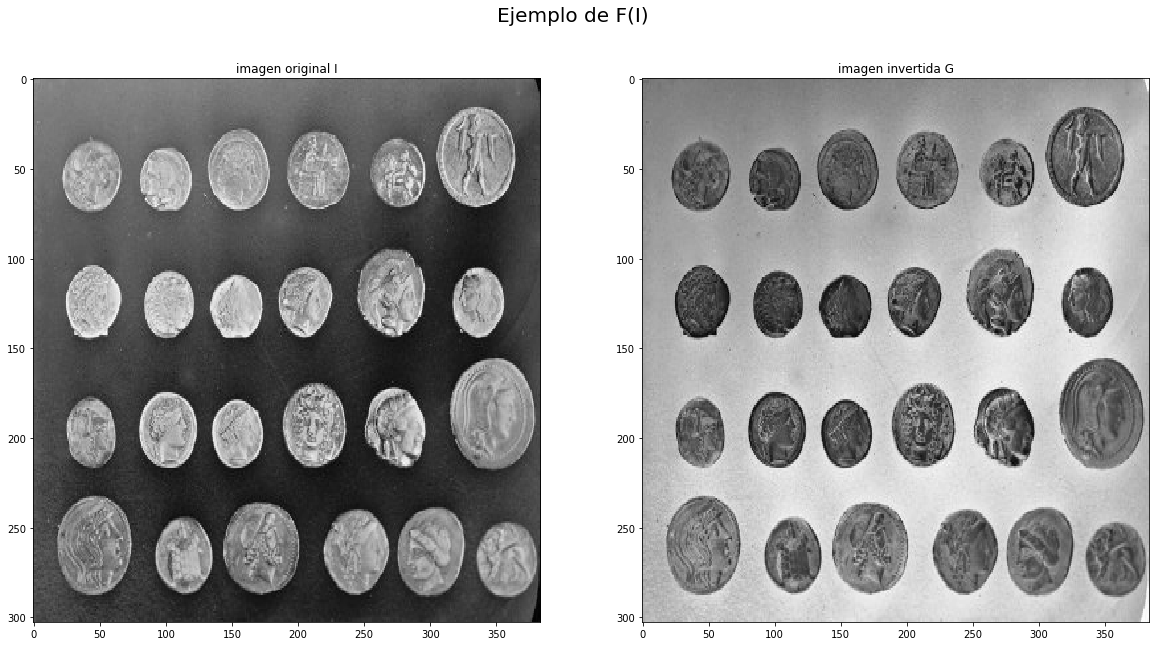

In [2]:
# Ejemplo 1
#Definir la función para sacar el negativo de una imagen
def F(I):
    return 255 - I
#Leer las imagenes
I = data.coins()
#Aplicar la función F sobre la imagen
G = F(I)
#Se hace un plot de 1x2 para mostrar las imágenes(horizontal)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
#Se le coloca título a la figura, titulos a las imágenes y se muestran
fig.suptitle('Ejemplo de F(I)', fontsize=20)
ax1.set_title('imagen original I')
ax1.imshow(I, cmap='gray', aspect='auto')
ax2.set_title('imagen invertida G')
ax2.imshow(G, cmap='gray', aspect='auto')

/usr/lib/python3/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


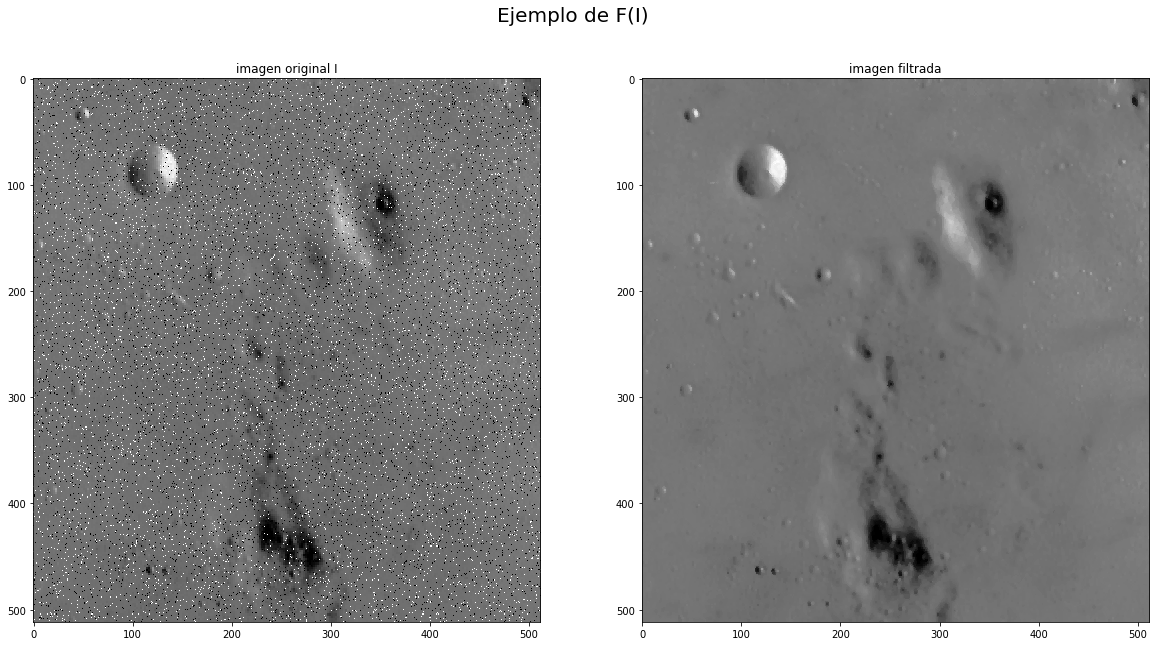

In [3]:
# Ejemplo 2
#Se define la función de filtrado de ruido
def F(I):
    #Filtro de mediana
    return filters.median(I, disk(2))
#Aplicarle un ruido aleatorio a la imagen
I = util.random_noise(data.moon(), mode='s&p')
#Aplicar el filtro a la imagen ruidosa
G = F(I)
#Se hace un plot de 1x2 para mostrar las imágenes(horizontal)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
#Se le coloca título a la figura, titulos a las imágenes y se muestran
fig.suptitle('Ejemplo de F(I)', fontsize=20)
ax1.set_title('imagen original I')
ax1.imshow(I, cmap='gray', aspect='auto')
ax2.set_title('imagen filtrada')
ax2.imshow(G, cmap='gray', aspect='auto')

<hr>
Nuestra función de transformación de imágenes también puede realizar operaciones con múltiples imágenes, es decir, un transformación de procesamiento de imágenes no se limita a una única imagen de entrada.
<br><br>
En este caso, nuestra función se transforma en:
<center><i>Ecuación. Función de transformación depedendiente de multiples imágenes.</i></center>
<center><h2>$G = F(I_1, I_2, I_3,...,I_n)$</h2></center>
<hr>

In [5]:
from skimage.transform import resize

/usr/lib/python3/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


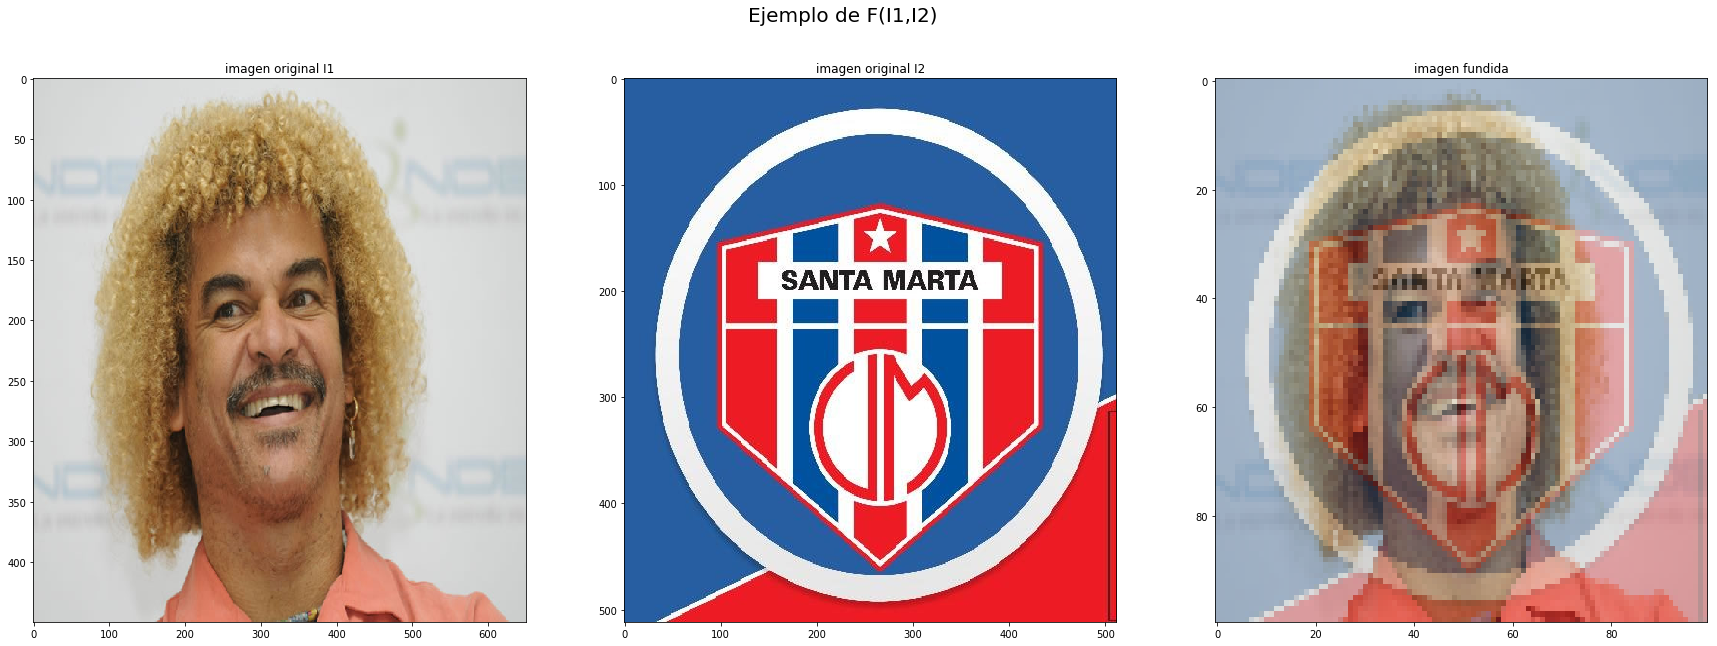

In [6]:
#Función para darle el mismo tamaño a las imágenes y poder aplicarles una operación matricial
def F(I1,I2):
    I1 = resize(I1,(100,100))
    I2 = resize(I2,(100,100))
    k = 0.3
    return (1-k) * I1 + k * I2
#Leer las imagenes
I1 = io.imread('res/pibe.jpg')
I2 = io.imread('res/union.jpg')
#Aplicar la función de transformación
G = F(I1,I2)
#Se hace un plot de 1x3 para mostrar las imágenes(horizontal)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 10))
#Se le coloca título a la figura, titulos a las imágenes y se muestran
fig.suptitle('Ejemplo de F(I1,I2)', fontsize=20)
ax1.set_title('imagen original I1')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('imagen original I2')
ax2.imshow(I2, cmap='gray', aspect='auto')
ax3.set_title('imagen fundida')
ax3.imshow(G, cmap='gray', aspect='auto')

<center><i>Figura. Ejemplos de segmentacion.</i></center>
<img src="res/segmentacion.png" alt="Ejemplos de segmentacion" style="width:800px">

Una tarea de gran interes y dinámica dentro de la comunidad de PDI es la segmentación, la cual consiste en subdividir la imagen de entrada <i>I</i> en regiones que contienen objetos únicos. En este caso nuestra función <i>F</i> se transforma en:
<br><br>
<center><i>Ecuación. Función de segmentacion.</i></center>
<center><h2>$G[k] = F(I,k)$</h2></center>
<br><br>
donde <i>G</i> ahora es un vector con subimágenes de la imagen original.
<br><br>
¿Consideran que la segmentación de imágenes hace parte de una tarea de procesamiento digital de imágenes o requiere un nivel superior de procesamiento?
<br><br>
<center><i>Figura. ¿Cuantos segmentos podríaa extraer de esta imagen?.</i></center>
<img src="res/hidden-leopard.jpg" alt="Ejemplos de segmentacion" style="width:800px">
<br><br>
<center><b>¿Qué resultado hubiese tenido el proceso de segmentación si se hubiese sabido que en la imagen hay un leopardo?</b><center>
<hr>

<hr>
Si bien diversas ramas de la ciencia e ingenieria encuentran casos de aplicacion del PDI y la visión artificial, la industria del entretenimiento y de la publicidad genera a día de hoy la mayor cantidad de avances tecnológicos.
<center><a href='http://perso.crans.org/frenoy/matlab2012/seamcarving.pdf'>Seam Carving</a></center>
<img src="res/seam_carving.png" alt="seam carving" style="width:1000px">
<br><br>
La inteligencia artificial ha encontrado recientemente aplicacion en el PDI y es uno de los tópicos <b>hot</b> en PDI: <a href='https://blog.google/products/google-plus/saving-you-bandwidth-through-machine-learning/'>Rapid and Accurate Image Super Resolution</a>
<br><br>
<center><i>Figura. Ejemplo de Google RAISR.</i></center>
<img src="res/RAISR.png" alt="Google RAISR" style="width:800px">
<br><br>
Diversas conferencias científicas tales como SIGGRAPH, generan constante avances en PDI.
<br><br>
<a href='https://www.youtube.com/watch?v=ONZcjs1Pjmk'>Eulerian Video Amplification</a>
<br><br>

### Conclusión
Para resumir, la visión artificial es una intersección entre distintas ramas de las ciencias de la computación cuyo objetivo final es la comprensión de imágenes digitales. La primera de las ramas a discutir, el procesamiento de imagenes digitales, trata con las transformaciones y operaciones realizadas sobre una imagen o conjunto de imagenes con el objetivo de mejorar la calidad de la información en términos de su contraste, nítidez o limpieza, realizar transformaciones espaciales y extraer objetos o características de interés tales como segmentos o bordes. En esta asignatura, abordaremos inicialmente las técnicas clásicas de PDI, para luego pasar al análisis de imágen y finalmente al reconocimiento de patrones.
<hr>